In [4]:
import csv
import pandas as pd

In [199]:
Title = 'Walker Run'

f = 'final_data/medium_tasks/task=walker_run/train.csv'
df = pd.read_csv(f)
# .iloc[::20, :].reset_index()
df.head()

actor_ent  actor_logprob  actor_loss  batch_reward  buffer_size  \
0   8.489292      -5.633982   -0.201445      0.050417       2500.0   
1   8.483868      -5.612106   -0.404795      0.051930       3000.0   
2   8.478439      -5.607604   -0.607864      0.052752       3500.0   
3   8.473004      -5.600694   -0.801993      0.055812       4000.0   
4   8.467565      -5.590748   -1.010615      0.061058       4500.0   

   critic_loss  critic_q1  critic_q2  critic_target_q  episode  \
0     0.002259   0.192219   0.192383         0.192226      5.0   
1     0.002451   0.369798   0.369775         0.370082      6.0   
2     0.003602   0.573727   0.573726         0.573925      7.0   
3     0.004140   0.772544   0.772517         0.772597      8.0   
4     0.005259   0.983224   0.983240         0.983626      9.0   

   episode_length  episode_reward        fps  frame    step  total_time  
0          1000.0       34.122531  16.866548   5000  2500.0   59.288958  
1          1000.0       25.511699  69.125048   6000  3000.0   73.755495  
2          1000.0       38.768075  69.607942   7000  3500.0   88.121672  
3          1000.0       46.366601  70.064875   8000  4000.0  102.394160  
4          1000.0        5.067748  69.959186   9000  4500.0  116.688209

In [200]:
r = 'curves/dmc_walker_run.csv'
df2 = pd.read_csv(r)
df2.head()

Unnamed: 0   agent        task  seed  frame  episode_reward      hour
0           0  DrQ-v2  walker_run     1      0       19.964171  0.000002
1           1  DrQ-v2  walker_run     1  20000       16.482848  0.078186
2           2  DrQ-v2  walker_run     1  40000       30.298394  0.168208
3           3  DrQ-v2  walker_run     1  60000       28.359231  0.256861
4           4  DrQ-v2  walker_run     1  80000       33.917805  0.347501

In [201]:
import seaborn as sns
sns.set(font_scale=0.7, )
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter1d

/tmp/ipykernel_5636/484800509.py:6: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


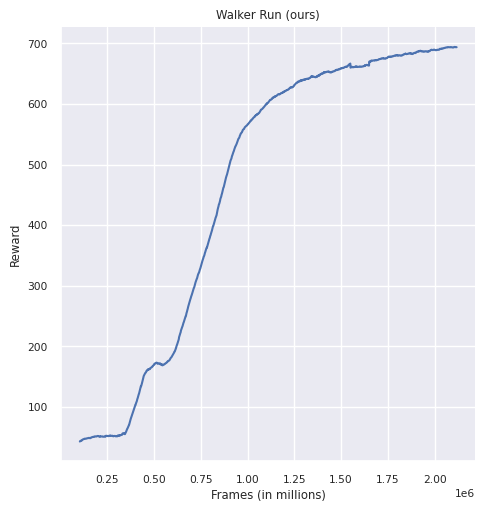

In [202]:

ax = sns.relplot(df[['frame', 'episode_reward']].set_index('frame').rolling(100).mean(), kind='line',)
ax.set(xlabel='Frames (in millions)', ylabel='Reward',title = f'{Title} (ours)')
ax._legend.remove()

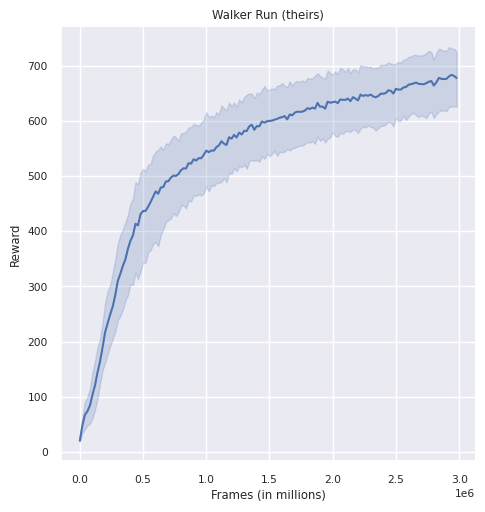

In [203]:
ax = sns.relplot(df2[['frame', 'episode_reward']].set_index('frame'), kind='line',)
ax.set(xlabel='Frames (in millions)', ylabel='Reward',title = f'{Title} (theirs)')
ax._legend.remove()


In [ ]:
final_data/medium_tasks/task=quadruped_walk/train.csv

final_data/medium_tasks/task=acrobot_swingup/train.csv

In [252]:
og = 'final_data/medium_tasks/task=acrobot_swingup/train.csv'
n1 = 'final_data/ablation_sac/acr/train.csv'

df_og = pd.read_csv(og)
df_og = df_og[['frame', 'episode_reward']].set_index('frame').rename(columns={"episode_reward": "DDPG"}).rolling(100).mean()
df_1 = pd.read_csv(n1)
df_1 = df_1[['frame', 'episode_reward']].set_index('frame').rename(columns={"episode_reward": "SAC"}).rolling(100).mean()


In [253]:
dftemp = pd.merge(df_og, df_1, left_index=True, right_index=True)


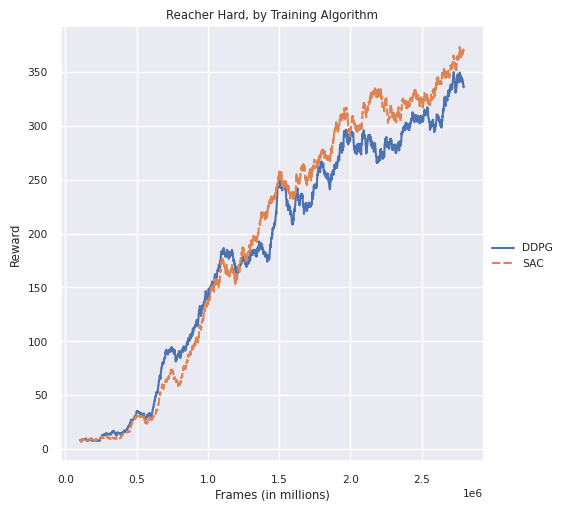

In [254]:

ax = sns.relplot(dftemp, kind='line',)
ax.set(xlabel='Frames (in millions)', ylabel='Reward',title = f'Reacher Hard, by Training Algorithm')
# ax._legend.remove()